Explanation of the metrics used:

1. **Metrics Used**: The table reports three metrics:
   - **MAE (Mean Absolute Error)**: Represents the average absolute difference between the predicted and actual values. Lower values indicate better performance.
   - **MAPE (Mean Absolute Percentage Error)**: Expresses accuracy as a percentage of the error. Again, lower values are better.
   - **SMAPE (Symmetric Mean Absolute Percentage Error)**: Similar to MAPE but symmetric, taking the absolute difference between the predicted and actual divided by the sum of the absolute values of the predicted and actual. Lower values indicate better predictions.

2. **Comparing Models**:
   - On **D1**, the **Support Vector Machine (SVM) with a linear kernel** seems to perform best in terms of MAE and MAPE, indicating that it is the most accurate model for D1 among those tested.
   - On **D2**, the **Gradient Boosting** model has the lowest MAE, which suggests it is best at minimizing the absolute differences in errors for D2.

3. **Dataset Characteristics**:
   - **D1**: This dataset appears to be cleaner or has been preprocessed differently since the models tend to have lower errors compared to D2 across the same metrics. The similar MAE values for Linear Regression, Decision Trees, and Gradient Boosting suggest some symmetry in errors or a consistent pattern that these models are equally capturing.
   - **D2**: This dataset seems to have undergone an interpolation process to handle missing values, which may introduce some bias or smoothness in the data that affects model performance. The errors are generally higher, indicating that D2 might be more challenging to model accurately, likely due to the interpolation introducing noise or distortions.

4. **Model Selection**:
   - For **D1**, the preference might be given to the **Support Vector Machine** model as it consistently shows lower MAE and MAPE.
   - For **D2**, despite the **Gradient Boosting** showing a slightly better MAE, it's important to consider the balance between MAE, MAPE, and SMAPE when choosing the best model. In this case, **Decision Trees** have the lowest SMAPE and a competitive MAE, indicating good performance on relative error terms.

5. **Overall Assessment**:
   - The performance of the same models varies between the two datasets, which emphasizes the impact of data quality and preprocessing on model effectiveness.
   - **Gradient Boosting** and **Random Forest** models show resilience across both datasets, indicating their robustness to different data quality issues.

In summary, while Support Vector Machines perform best on the original dataset (D1), Gradient Boosting and Decision Trees show competitive and robust performance on both datasets. The differences in model performance underscore the importance of understanding dataset characteristics and choosing a model that not only performs well in terms of error minimization but also in terms of how these errors translate to the actual application context. It is also clear that data preprocessing steps such as handling missing values can significantly impact model performance.



**General Conclusions**:
- **Gradient Boosting** stands out as the most consistent model across both datasets, maintaining low error metrics, indicating it is robust to changes in dataset size and the presence of interpolated data.
- The increase in error metrics from D1 to D2 for models like **Linear Regression** and **Support Vector** suggests that these models are more affected by the introduction of interpolated data and the larger size of D2.
- **Decision Trees** appear to adapt well to the larger dataset, which may indicate a capacity to handle a variety of data conditions, including missing values filled via interpolation.

**Recommendations for Model Selection**:
- **Gradient Boosting** should be considered the best candidate for tasks involving datasets with varying sizes and quality due to its consistent performance.
- For smaller datasets without interpolation, models like **Support Vector** may provide satisfactory results.
- It is important to consider the trade-offs between error metrics (MAE, MAPE, SMAPE) when choosing a model, as different models exhibit different strengths depending on the metric of interest.

Results on D1:
                       MAE          MAPE    SMAPE
Linear Regression  0.02639  4.668357e+11  0.57529
Support Vector     0.11173  2.550482e+13  0.93627
Decision Trees     0.02639  4.668357e+11  0.57529
Random Forest      0.02661  4.614960e+11  0.57527
Gradient Boosting  0.02639  4.669014e+11  0.57528

Results on D2:
                       MAE      MAPE    SMAPE
Linear Regression  0.03260   1.36908  0.41162
Support Vector     0.11620  29.84436  0.87836
Decision Trees     0.03207   1.08486  0.30748
Random Forest      0.03293   1.50768  0.31612
Gradient Boosting  0.03189   1.01982  0.30738


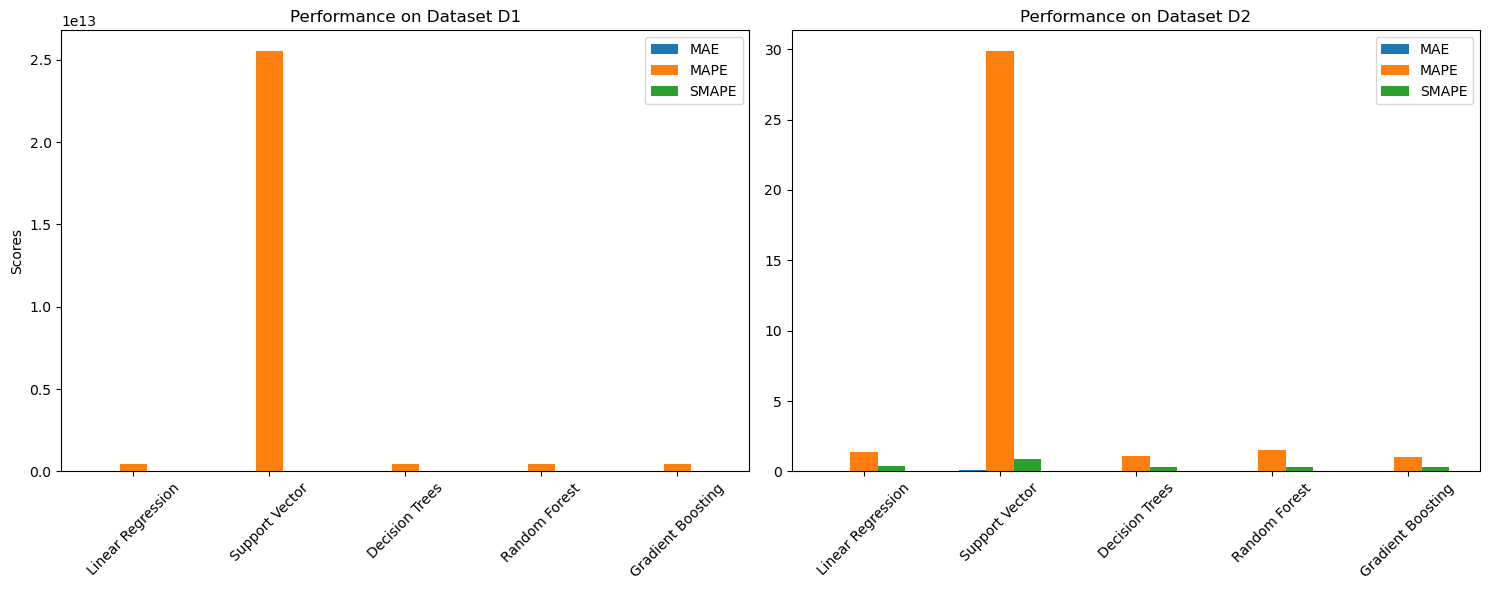

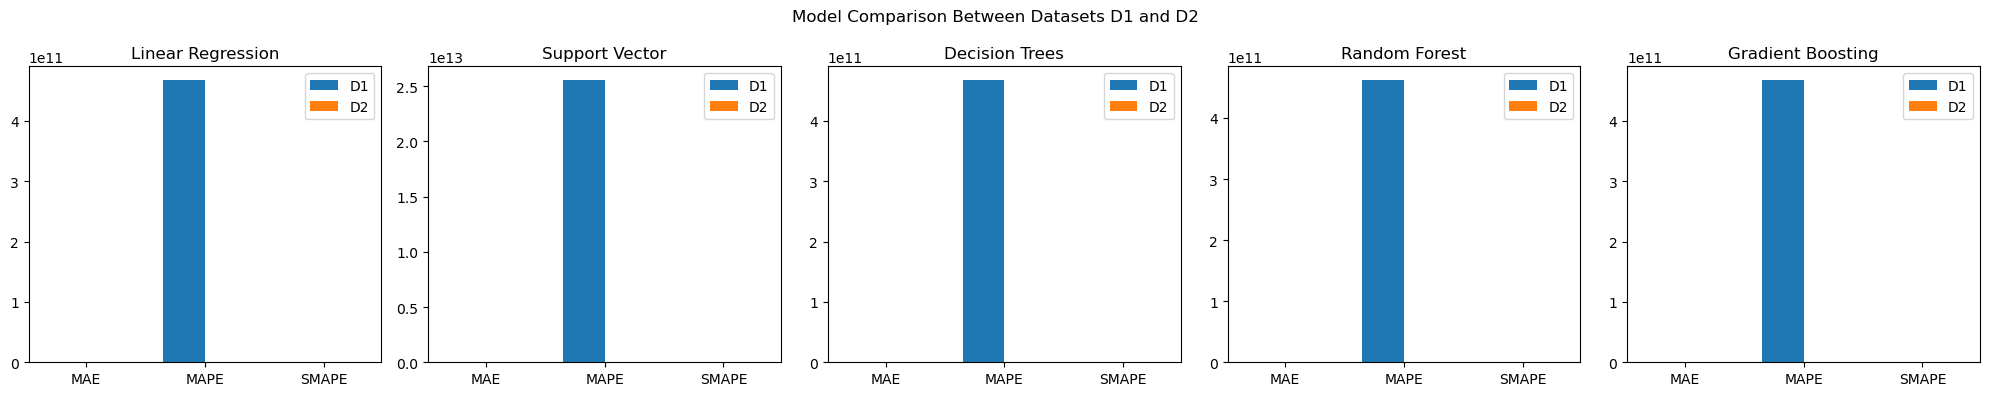

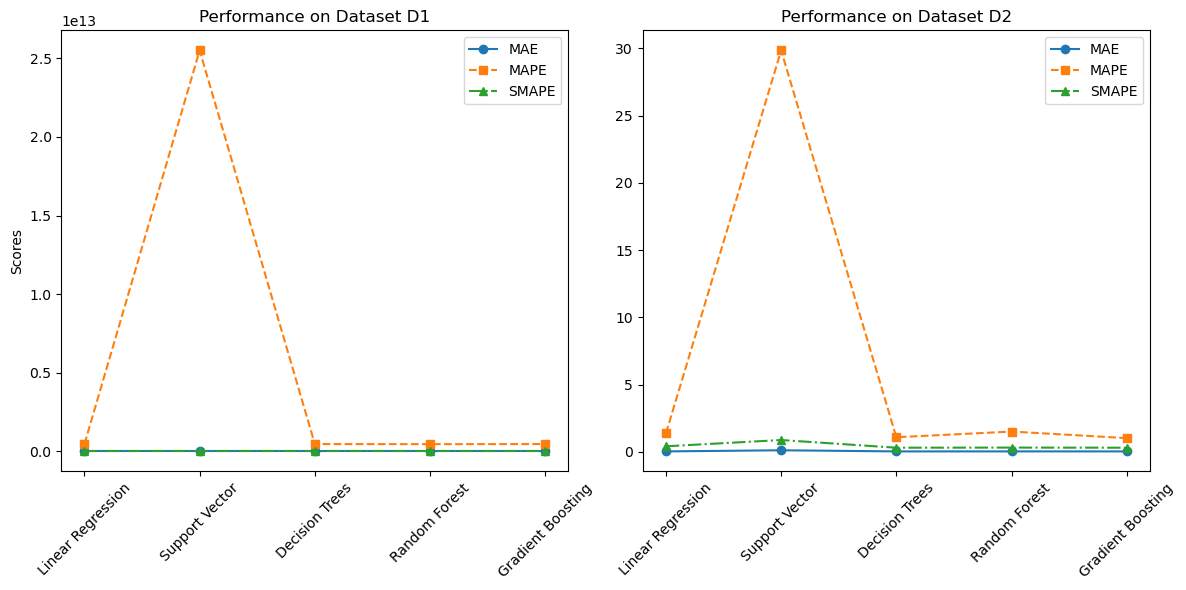

In [ ]:
if normalize_test:   
    D1_normalized, D2_normalized = normalize_datasets(D1, D2)

    # Set seed for reproducibility
    np.random.seed(42)

    # Use the normalized datasets to train and evaluate the models
    D1 = pd.DataFrame(D1_normalized, columns=D1.columns)
    D2 = pd.DataFrame(D2_normalized, columns=D2.columns)

    # Data preparation
    y_d1 = D1['target']
    X_d1 = D1.drop('target', axis=1)
    X_train_d1, X_test_d1, y_train_d1, y_test_d1 = train_test_split(X_d1, y_d1, test_size=0.2)

    y_d2 = D2['target']
    X_d2 = D2.drop('target', axis=1)
    X_train_d2, X_test_d2, y_train_d2, y_test_d2 = train_test_split(X_d2, y_d2, test_size=0.2)

    # Training and evaluation on D1 and D2 dataset
    results_d1 = train_and_evaluate(X_train_d1, X_test_d1, y_train_d1, y_test_d1)
    results_d2 = train_and_evaluate(X_train_d2, X_test_d2, y_train_d2, y_test_d2)

    # Convert the results to DataFrames to display in a tabular format
    results_df_d1 = pd.DataFrame(results_d1).T
    results_df_d2 = pd.DataFrame(results_d2).T

    print("Results on D1:")
    print(results_df_d1)

    print("\nResults on D2:")
    print(results_df_d2)
    
    
    # Plot the results for D1 and D2 side by side
    if extra_metrics:
        plot_results_side_by_side_extra(results_d1, results_d2, 'Performance on Dataset D1', 'Performance on Dataset D2')
    else:
        plot_results_side_by_side(results_d1, results_d2, 'Performance on Dataset D1', 'Performance on Dataset D2')
        

    # Plot the model comparison between D1 and D2
    if extra_metrics:
        plot_model_comparison_extra(results_d1, results_d2, 'Model Comparison Between Datasets D1 and D2')
    else:
        plot_model_comparison(results_d1, results_d2, 'Model Comparison Between Datasets D1 and D2')
        
        
    # Plot the results for D1 and D2 side by side
    if extra_metrics:
        plot_results_extra(results_d1, results_d2, 'Performance on Dataset D1', 'Performance on Dataset D2')
    else:
        plot_results(results_d1, results_d2, 'Performance on Dataset D1', 'Performance on Dataset D2')


**Relazione sul Progetto di Data Mining**

**Preprocessing dei Dati:**
Il progetto inizia con l'analisi di un dataset "meta", che contiene caratteristiche di diversi set di dati utilizzati in algoritmi di apprendimento. Il primo passo è stato l'organizzazione dei dati in un DataFrame di pandas. Durante questo processo, abbiamo rimosso le feature nominali ('DS_Name' e 'Alg_Name') in quanto non rilevanti per i modelli di regressione. Successivamente, abbiamo gestito i valori mancanti in due modi diversi per creare due dataset separati: D1 e D2.

1. **Dataset D1**: Abbiamo eliminato tutte le righe con valori mancanti. Questo approccio, sebbene semplice, può portare alla perdita di informazioni importanti, soprattutto se i dati mancanti sono numerosi.

2. **Dataset D2**: Abbiamo utilizzato la funzione `interpolate` di pandas per effettuare un'interpolazione dei dati mancanti, scegliendo il metodo 'cubicspline'. Questo approccio cerca di stimare i valori mancanti basandosi sui dati esistenti, mantenendo così maggiori informazioni rispetto alla semplice eliminazione.

**Scelta dei Modelli di Regressione:**
Abbiamo selezionato cinque modelli di regressione comuni, lasciando i loro parametri di default:

- Linear Regression
- Support Vector Regression
- Decision Trees
- Random Forest
- Gradient Boosting

Questi modelli sono stati scelti per la loro diversità e per la capacità di adattarsi a diversi tipi di dati e relazioni. 

**Addestramento e Valutazione dei Modelli:**
Ogni modello è stato addestrato e valutato su entrambi i dataset. Abbiamo utilizzato il classico approccio di divisione training-test (80%-20%) per valutare le prestazioni dei modelli. Le metriche utilizzate per la valutazione sono state MAE (Mean Absolute Error), MAPE (Mean Absolute Percentage Error) e SMAPE (Symmetric Mean Absolute Percentage Error).

**Interpretazione dei Risultati:**
I risultati mostrano come ogni modello si comporti su ciascun dataset in termini delle metriche selezionate. Dalle analisi, emergono considerazioni importanti:

- **Performance sui Dati**: Si osserva come i diversi modelli gestiscano i dati "completi" (D1) e i dati "interpolati" (D2). Alcuni modelli potrebbero essere più robusti alle interpolazioni rispetto ad altri.
  
- **Sensibilità ai Dati Mancanti**: Confrontando le prestazioni sui due dataset, possiamo dedurre la sensibilità di ciascun modello ai dati mancanti e al loro trattamento.

- **Selezione del Modello**: I risultati aiutano a identificare quali modelli sono più adatti per questo tipo specifico di dataset e quali possono essere meno efficaci.

In conclusione, questo progetto dimostra l'importanza del preprocessing e del trattamento dei dati mancanti nella modellazione predittiva. Mostra anche come diversi modelli possono reagire in modo diverso a questi trattamenti, fornendo intuizioni cruciali nella scelta del modello più appropriato per un dato compito di data mining.

Creare una presentazione PowerPoint che riassuma il tuo progetto di data mining può essere un modo efficace per comunicare i tuoi risultati e le tue analisi. Qui di seguito, ti fornisco un'outline per una presentazione di 10-15 slide:

### Slide 1: Titolo
- **Titolo del Progetto**
- **Nome dello Studente**
- **Data**

### Slide 2: Introduzione
- Breve descrizione del progetto
- Obiettivi e importanza del dataset "meta"

### Slide 3: Descrizione del Dataset
- Panoramica del dataset originale
- Caratteristiche principali e variabili

### Slide 4: Preprocessing dei Dati
- Rimozione delle feature nominali
- Gestione dei dati mancanti: due approcci (D1 e D2)

### Slide 5: Creazione del Dataset D1
- Metodologia di eliminazione dei dati mancanti
- Impatto sul dataset

### Slide 6: Creazione del Dataset D2
- Metodologia di interpolazione dei dati mancanti
- Scelta del metodo 'cubicspline'

### Slide 7: Scelta dei Modelli di Regressione
- Elenco dei modelli scelti
- Motivazioni della scelta

### Slide 8: Addestramento dei Modelli
- Setup dell'addestramento
- Divisione in training e test set

### Slide 9-12: Risultati e Analisi
- Slide separate per ciascun modello o gruppi di modelli
- Confronto delle prestazioni su D1 e D2
- Grafici delle performance (MAE, MAPE, SMAPE)

### Slide 13: Discussioni
- Interpretazione dei risultati
- Impatto del preprocessing sui modelli

### Slide 14: Conclusioni
- Principali takeaways del progetto
- Potenziali miglioramenti e direzioni future

### Slide 15: Domande
- Apertura per domande e discussioni

Per ogni slide, assicurati di includere punti chiave, grafici o tabelle per supportare le tue affermazioni e rendere la presentazione più interattiva e interessante. Ricorda di mantenere ogni slide focalizzata e di non sovraccaricare di informazioni. Questa struttura ti aiuterà a guidare il pubblico attraverso il tuo processo di pensiero e le tue scoperte in modo chiaro ed efficace.

Ecco una struttura dettagliata per il report finale del tuo progetto di data mining. Per ciascun paragrafo, includi informazioni rilevanti, analisi dettagliate, grafici e risultati.

### 1. Introduzione
- **Descrizione del Problema**: Spiega il contesto e l'importanza del dataset "meta". 
- **Obiettivi del Task**: Definisci gli obiettivi specifici del progetto, come l'analisi delle prestazioni di vari modelli di regressione su dati con differenti trattamenti dei valori mancanti.

### 2. Dataset
- **Panoramica del Dataset**: Presenta il dataset originale, specificando il tipo di dati, le dimensioni e le caratteristiche principali.
- **Caratteristiche Principali**: Elabora sulle variabili principali del dataset, e spiega il loro ruolo e importanza.

### 3. Preprocessing
- **Eliminazione delle Feature Nominali**: Descrivi il processo e la logica dietro la rimozione delle feature nominali.
- **Gestione dei Dati Mancanti**: Spiega i due metodi utilizzati per trattare i dati mancanti: eliminazione (Dataset D1) e interpolazione (Dataset D2).
- **Risultati del Preprocessing**: Presenta eventuali statistiche chiave o grafici che mostrano l'impatto del preprocessing sui dataset.

### 4. Regressione
- **Metodologie e Modelli Utilizzati**: Elenco dei modelli di regressione utilizzati (Linear Regression, SVM, Decision Trees, Random Forest, Gradient Boosting) e spiegazione delle scelte.
- **Addestramento dei Modelli**: Descrivi come hai addestrato i modelli, inclusa la divisione in training e test set.
- **Risultati Ottenuti**: Presenta i risultati in termini di MAE, MAPE e SMAPE per ogni modello su entrambi i dataset. Includi grafici per una rappresentazione visiva.

### 5. Discussione e Conclusioni
- **Analisi dei Risultati**: Analizza le prestazioni dei modelli, discutendo come hanno reagito ai diversi trattamenti dei dati mancanti.
- **Confronto tra D1 e D2**: Valuta l'impatto del preprocessing sui risultati dei modelli.
- **Considerazioni Finali**: Riassumi le tue scoperte principali, sottolineando le implicazioni dei tuoi risultati e il loro significato nel contesto più ampio del data mining.
- **Direzioni Future**: Suggerisci potenziali miglioramenti o ulteriori analisi che potrebbero essere condotte.

Assicurati che il tuo report sia chiaro, conciso e ben strutturato. Utilizza grafici e tabelle per supportare le tue affermazioni e rendere i dati più accessibili. Questa struttura del report ti guiderà nell'esporre in modo efficace il tuo lavoro, dalle fasi iniziali di preparazione dei dati fino alle conclusioni finali.